Install Required libraries


In [1]:
!pip install econml
!pip install scikit-learn
!pip install matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: shap
    Found existin

ERROR: Operation cancelled by user
^C


Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from econml.dml import LinearDML


**Simulate Energy Policy Dataset**
Let’s assume a subsidy is given to some households to install solar panels, and we want to measure the impact on monthly energy consumption.

In [2]:
np.random.seed(42)
n = 1000

# Control variables (demographics, income, etc.)
X = pd.DataFrame({
    'income': np.random.normal(50000, 15000, n),
    'house_size': np.random.normal(1500, 500, n),
    'region': np.random.randint(0, 4, n),
    'education_years': np.random.randint(8, 20, n)
})

# Treatment: Whether household received a subsidy
T = np.random.binomial(1, 0.5, size=n)

# Outcome: Monthly energy bill (lower is better)
Y = 200 - 20*T + 0.01*X['income'] - 0.005*X['house_size'] + np.random.normal(0, 10, n)


Apply Double Machine Learning (DML)

In [3]:
# Split data
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X, T, Y, test_size=0.2)

# Initialize DML model
model = LinearDML(
    model_y=LassoCV(),
    model_t=RandomForestRegressor(),
    discrete_treatment=True
)

# Fit the model
model.fit(Y_train, T_train, X=X_train)

# Estimate treatment effects
treatment_effects = model.effect(X_test)


Not all column names are strings. Coercing to strings for now.
First stage model has discrete target but model is not a classifier!
First stage model has discrete target but model is not a classifier!


Step 5: Visualize the Results

This simulation tells you:

How much a solar subsidy reduced energy bills, on average.

That we used machine learning to adjust for income, house size, education, etc.

How treatment effects can vary across different households.

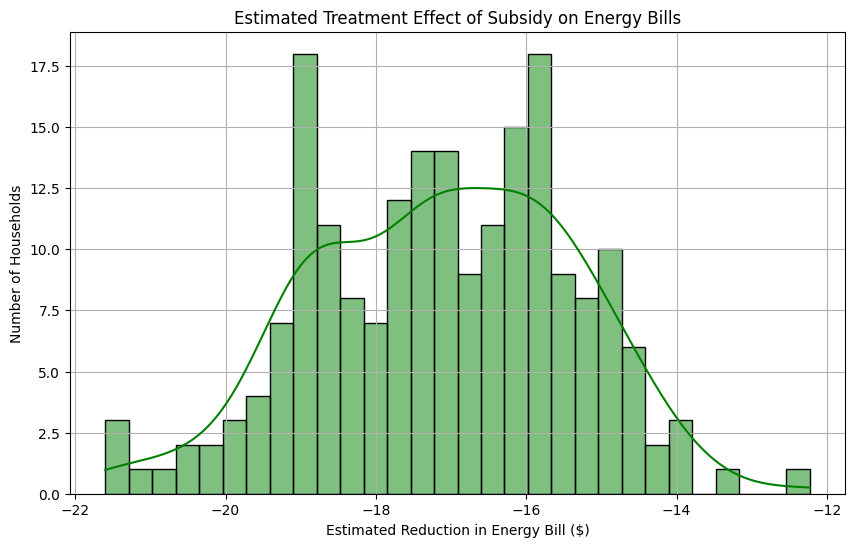

Average estimated treatment effect: -17.12


In [4]:
# Plotting treatment effect distribution
plt.figure(figsize=(10,6))
sns.histplot(treatment_effects, bins=30, kde=True, color='green')
plt.title("Estimated Treatment Effect of Subsidy on Energy Bills")
plt.xlabel("Estimated Reduction in Energy Bill ($)")
plt.ylabel("Number of Households")
plt.grid(True)
plt.show()

# Mean treatment effect
print("Average estimated treatment effect:", round(np.mean(treatment_effects), 2))
